<a href="https://colab.research.google.com/github/Sarayut-Aree/ML/blob/main/Stroke_Prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isna().sum() #missing values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f219be7d690>,
      dtype=object)

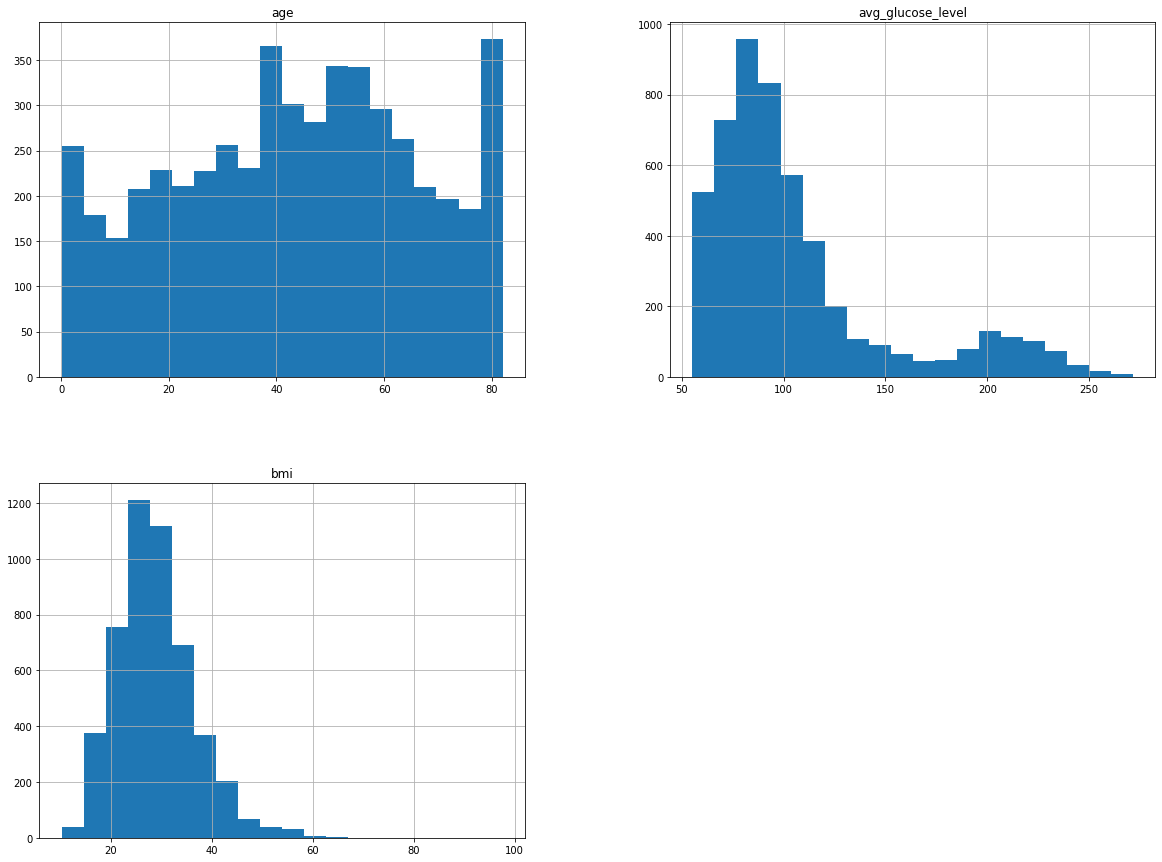

In [6]:
atttibutes_hist = df[["age", "avg_glucose_level", "bmi"]].hist(bins=20, figsize=(20,15))
atttibutes_hist

['Female', 'Male']
[2994, 2115]


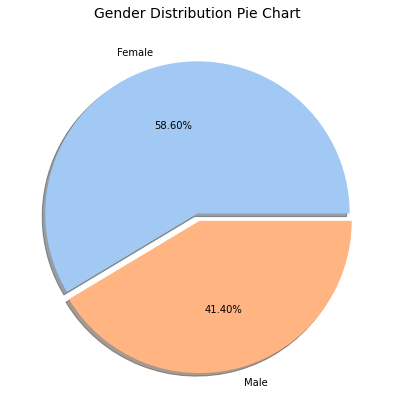

In [7]:
fig, ax = plt.subplots(1,1, figsize = (7,7))
colors = sns.color_palette('pastel')

labels = df['gender'].value_counts().index.tolist()[:2] #['Female', 'Male']
values = df['gender'].value_counts().tolist()[:2] #[2994, 2115]

ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0, 0.05])
ax.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [8]:
labels = df['hypertension'].value_counts().index.tolist()[:2]
labels

[0, 1]

['Not hypertension', 'hypertension']
[4612, 498]


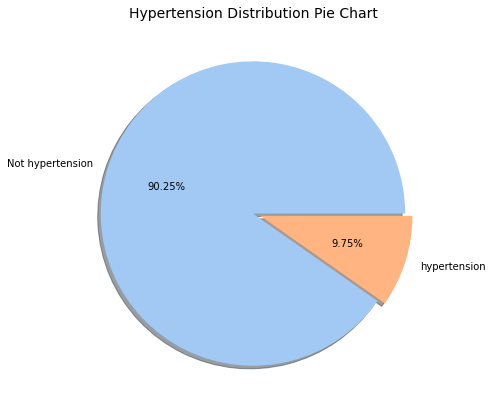

In [9]:
labels = ["Not hypertension", "hypertension"]
values = df['hypertension'].value_counts().tolist()[:2] #[4612, 498]

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0, 0.05])
ax.set_title("Hypertension Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [10]:
labels = df['heart_disease'].value_counts().index.tolist()[:2]
labels

[0, 1]

['No heart disease', 'heart disease']
[4834, 276]


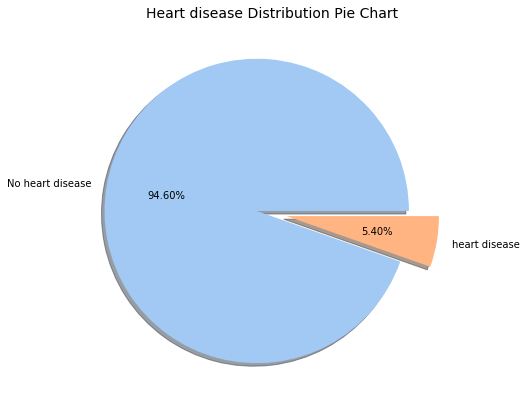

In [11]:
labels = ["No heart disease", "heart disease"]
values = df['heart_disease'].value_counts().tolist()[:2] 

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0.1, 0.1])
ax.set_title("Heart disease Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [12]:
labels = df['ever_married'].value_counts().index.tolist()[:2]
labels

['Yes', 'No']

['married', 'never married']
[3353, 1757]


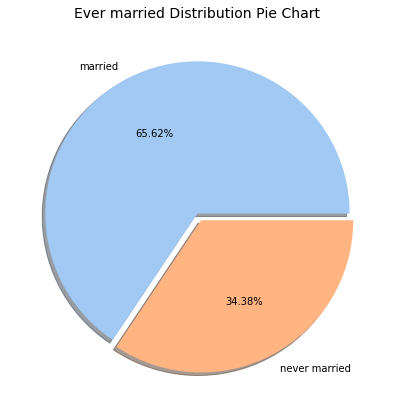

In [13]:
labels = ["married", "never married"]
values = df['ever_married'].value_counts().tolist()[:2] 

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0, 0.05])
ax.set_title("Ever married Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked']
[2925, 819, 687, 657, 22]


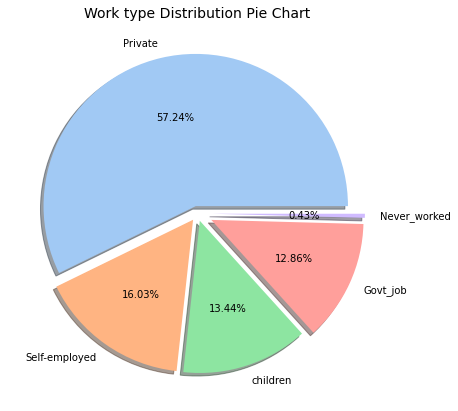

In [14]:
labels = df['work_type'].value_counts().index.tolist()
values = df['work_type'].value_counts().tolist()

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0.05,0.05,0.05,0.1,0.1])
ax.set_title("Work type Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

['Urban', 'Rural']
[2596, 2514]


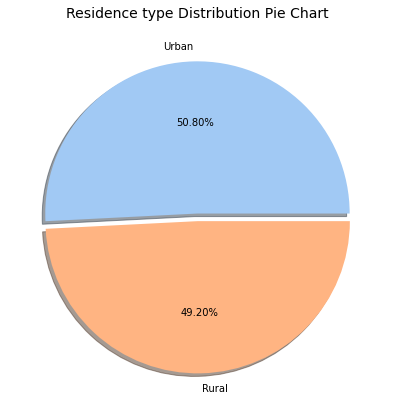

In [15]:
#Residence_type
labels = df['Residence_type'].value_counts().index.tolist()
values = df['Residence_type'].value_counts().tolist()

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0,0.05])
ax.set_title("Residence type Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

['never smoked', 'Unknown', 'formerly smoked', 'smokes']
[1892, 1544, 885, 789]


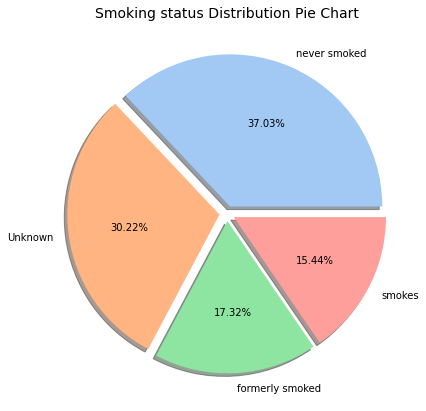

In [16]:
#smoking_status
labels = df['smoking_status'].value_counts().index.tolist()
values = df['smoking_status'].value_counts().tolist()

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0.05,0.05,0.05,0.05])
ax.set_title("Smoking status Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [17]:
labels = df['stroke'].value_counts().index.tolist()
labels

[0, 1]

['Not have stroke', 'Had stroke']
[4861, 249]


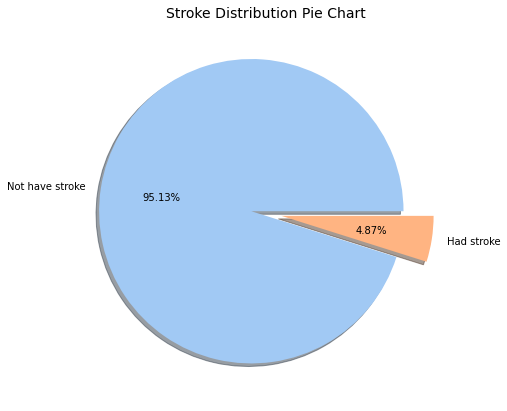

In [18]:
#stroke
labels = ['Not have stroke','Had stroke']
values = df['stroke'].value_counts().tolist()

fig, ax = plt.subplots(1,1, figsize = (7,7))
ax.pie(x=values, labels=labels, autopct="%.2f%%",colors=colors, shadow=True, explode=[0.1,0.1])
ax.set_title("Stroke Distribution Pie Chart", fontdict={'fontsize': 14})
print(labels)
print(values)
plt.show()

In [19]:
bmi_mean = df["bmi"].mean()
bmi_mean

28.893236911794673

In [20]:
df["bmi"].fillna(bmi_mean, inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
print(df['gender'].value_counts())
df = df[df['gender'] != "Other"] #remove row "Other" from gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [22]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [23]:
df_copy = df.copy()
df_result = pd.get_dummies(df_copy, columns=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 
                                             'smoking_status'], prefix=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type',
                                             'Residence_type', 'smoking_status'] )
df_result

,id,age,avg_glucose_level,bmi,stroke,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.600000,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,202.21,28.893237,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.500000,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.400000,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.000000,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,28.893237,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,125.20,40.000000,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,82.99,30.600000,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,166.29,25.600000,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [24]:
df_result.rename(columns={"hypertension_0": "no_hypertension", "hypertension_1": "yes_hypertension", "heart_disease_0": "no_heart_disease",
                          "heart_disease_1": "yes_heart_disease"}, inplace=True)
df_result

,id,age,avg_glucose_level,bmi,stroke,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.600000,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,202.21,28.893237,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.500000,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.400000,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.000000,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,28.893237,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,125.20,40.000000,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,82.99,30.600000,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,166.29,25.600000,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [25]:
df_result.corr()


,id,age,avg_glucose_level,bmi,stroke,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000000,0.003677,0.000943,0.003153,0.006430,-0.003610,0.003610,0.001253,-0.001253,-0.001929,...,0.005471,0.023545,-0.019879,-0.013869,0.001219,-0.001219,-0.019126,0.007419,0.011567,0.001081
age,0.003677,1.000000,0.238323,0.325858,0.245239,-0.276367,0.276367,-0.263777,0.263777,0.027752,...,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
avg_glucose_level,0.000943,0.238323,1.000000,0.168910,0.131991,-0.174540,0.174540,-0.161907,0.161907,-0.054722,...,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.003153,0.325858,0.168910,1.000000,0.038912,-0.160147,0.160147,-0.038862,0.038862,0.025606,...,-0.028612,0.204055,0.070756,-0.442945,0.000288,-0.000288,-0.265094,0.104674,0.106107,0.085516
stroke,0.006430,0.245239,0.131991,0.038912,1.000000,-0.127891,0.127891,-0.134905,0.134905,-0.009081,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
no_hypertension,-0.003610,-0.276367,-0.174540,-0.160147,-0.127891,1.000000,-1.000000,0.108292,-0.108292,0.021223,...,0.021612,0.005358,-0.115417,0.129535,-0.007980,0.007980,0.141551,-0.059022,-0.065018,-0.031213
yes_hypertension,0.003610,0.276367,0.174540,0.160147,0.127891,-1.000000,1.000000,-0.108292,0.108292,-0.021223,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
no_heart_disease,0.001253,-0.263777,-0.161907,-0.038862,-0.134905,0.108292,-0.108292,1.000000,-1.000000,0.085685,...,0.015715,-0.000068,-0.086742,0.091654,0.003045,-0.003045,0.066765,-0.066938,0.021893,-0.044030
yes_heart_disease,-0.001253,0.263777,0.161907,0.038862,0.134905,-0.108292,0.108292,-1.000000,1.000000,-0.085685,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
gender_Female,-0.001929,0.027752,-0.054722,0.025606,-0.009081,0.021223,-0.021223,0.085685,-0.085685,1.000000,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408


In [26]:
corr_matrix = df_result.corr()
corr_matrix["stroke"].sort_values(ascending = False)

stroke                            1.000000
age                               0.245239
yes_heart_disease                 0.134905
avg_glucose_level                 0.131991
yes_hypertension                  0.127891
ever_married_Yes                  0.108299
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
bmi                               0.038912
Residence_type_Urban              0.015415
work_type_Private                 0.011927
gender_Male                       0.009081
smoking_status_smokes             0.008920
id                                0.006430
work_type_Govt_job                0.002660
smoking_status_never smoked      -0.004163
gender_Female                    -0.009081
work_type_Never_worked           -0.014885
Residence_type_Rural             -0.015415
smoking_status_Unknown           -0.055924
work_type_children               -0.083888
ever_married_No                  -0.108299
no_hypertension                  -0.127891
no_heart_di

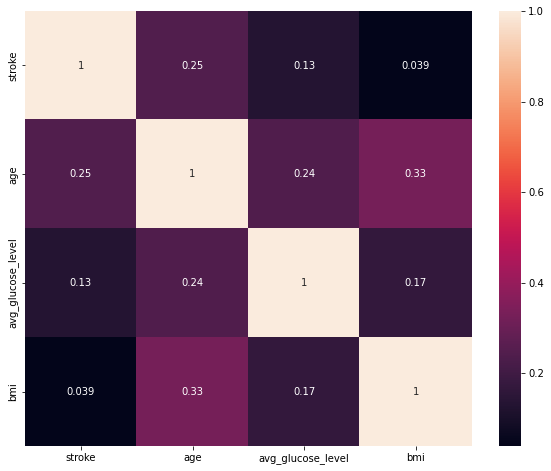

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_result[['stroke', 'age', 'avg_glucose_level', 'bmi']].corr(),annot=True)

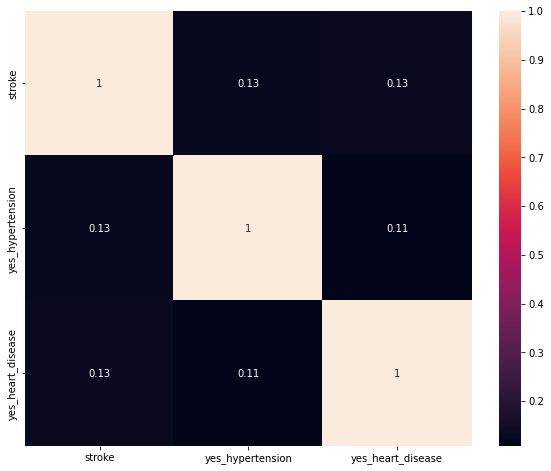

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_result[['stroke', 'yes_hypertension', 'yes_heart_disease']].corr(),annot=True)

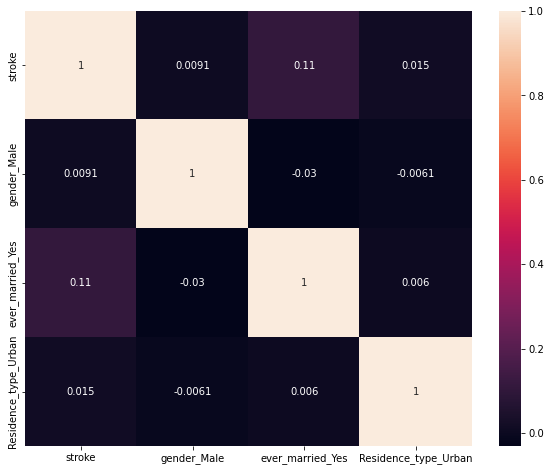

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_result[['stroke', 'gender_Male', 'ever_married_Yes', 'Residence_type_Urban']].corr(),annot=True)

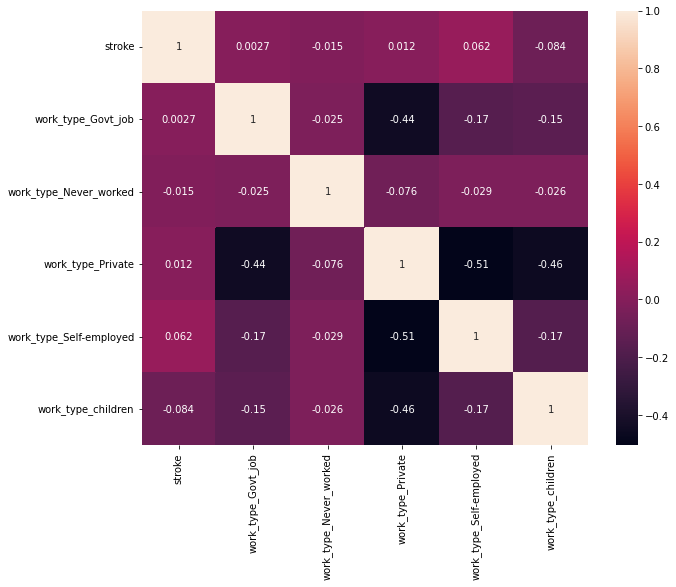

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_result[['stroke', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
                       'work_type_Self-employed', 'work_type_children']].corr(),annot=True)

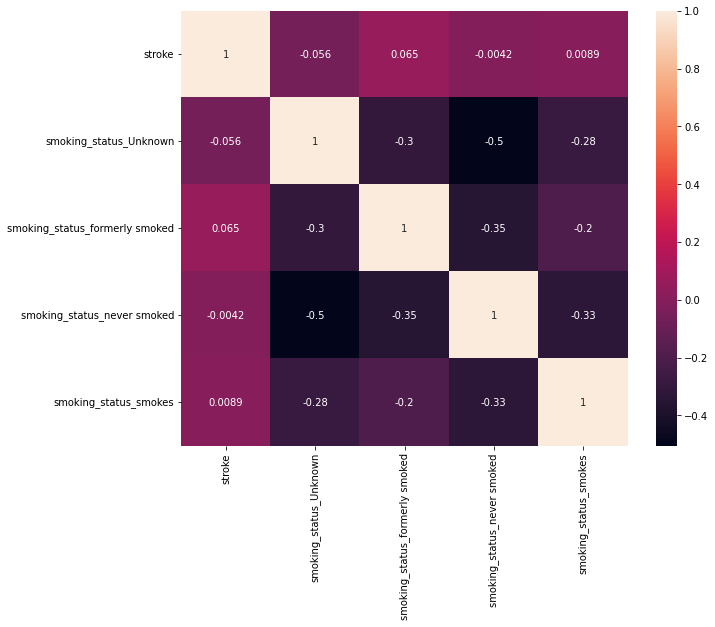

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_result[['stroke', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
                       'smoking_status_never smoked', 'smoking_status_smokes']].corr(),annot=True)

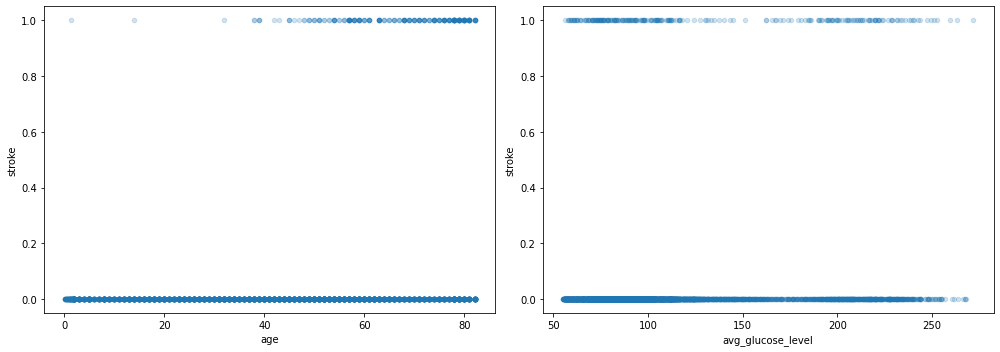

In [32]:
df = df_result

fig, ax = plt.subplots(1,2, figsize = (14,5), )
((ax1, ax2)) = ax

df.plot(ax=ax1, kind='scatter', x='age', y='stroke', alpha = 0.2)
df.plot(ax=ax2, kind='scatter', x='avg_glucose_level', y='stroke', alpha = 0.2)

plt.tight_layout()
plt.show()

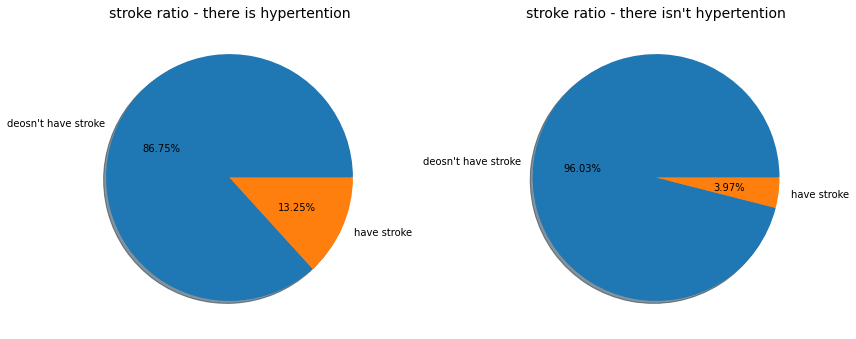

In [33]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['yes_hypertension']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is hypertention", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['no_hypertension']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't hypertention", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

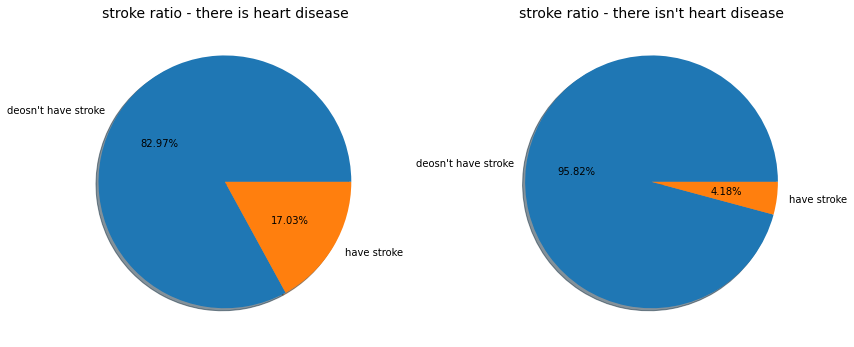

In [34]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['yes_heart_disease']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is heart disease", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['no_heart_disease']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't heart disease", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

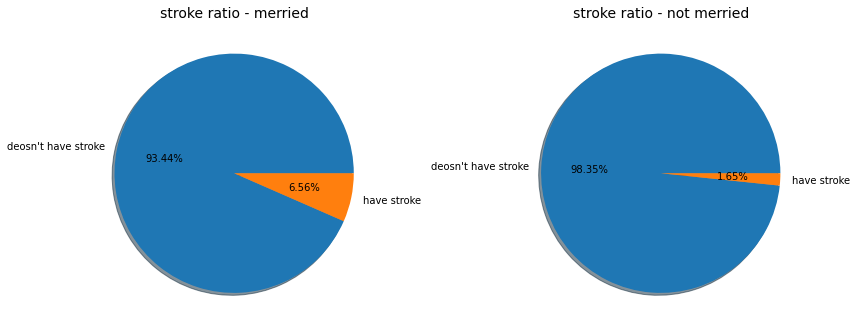

In [35]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['ever_married_Yes']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - merried", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['ever_married_No']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - not merried", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

In [36]:
corr_matrix = df_result.corr()
bmi_corr = corr_matrix["bmi"].sort_values(ascending = False).drop('bmi')
bmi_corr

ever_married_Yes                  0.335563
age                               0.325858
work_type_Private                 0.204055
avg_glucose_level                 0.168910
yes_hypertension                  0.160147
smoking_status_never smoked       0.106107
smoking_status_formerly smoked    0.104674
smoking_status_smokes             0.085516
work_type_Govt_job                0.077885
work_type_Self-employed           0.070756
stroke                            0.038912
yes_heart_disease                 0.038862
gender_Female                     0.025606
id                                0.003153
Residence_type_Rural              0.000288
Residence_type_Urban             -0.000288
gender_Male                      -0.025606
work_type_Never_worked           -0.028612
no_heart_disease                 -0.038862
no_hypertension                  -0.160147
smoking_status_Unknown           -0.265094
ever_married_No                  -0.335563
work_type_children               -0.442945
Name: bmi, 

In [37]:
print(bmi_corr[bmi_corr>0.15])
print(bmi_corr[bmi_corr<-0.15])

ever_married_Yes     0.335563
age                  0.325858
work_type_Private    0.204055
avg_glucose_level    0.168910
yes_hypertension     0.160147
Name: bmi, dtype: float64
no_hypertension          -0.160147
smoking_status_Unknown   -0.265094
ever_married_No          -0.335563
work_type_children       -0.442945
Name: bmi, dtype: float64


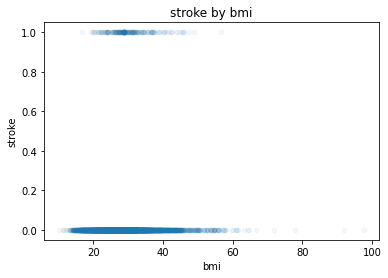

In [38]:
df.plot.scatter( x='bmi', y='stroke', alpha = 0.05, title="stroke by bmi")

In [39]:
values_30plusminusBMI = df[(df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
values_stroke = df['stroke'].value_counts().tolist()

In [40]:
values_30plusminusBMI

[1569, 129]

In [41]:
values_stroke

[4860, 249]

In [42]:
print("-+30bmi without stroke cases : all wothiut stroke cases (ratio) = " + str(values_30plusminusBMI[0]/values_stroke[0]))
print("-+30bmi : all observations (ratio) = " + str(sum(values_30plusminusBMI)/sum(values_stroke)))
print("-+30bmi with stroke cases : all stroke cases (ratio) = " + str(values_30plusminusBMI[1]/values_stroke[1]))
print("as we can see, among 1/2 of the stroke cases the bmi is around 30. In contrast to cases where there is no stroke where the ratio is significantly lower, only 1/3.")

-+30bmi without stroke cases : all wothiut stroke cases (ratio) = 0.3228395061728395
-+30bmi : all observations (ratio) = 0.33235466823253085
-+30bmi with stroke cases : all stroke cases (ratio) = 0.5180722891566265
as we can see, among 1/2 of the stroke cases the bmi is around 30. In contrast to cases where there is no stroke where the ratio is significantly lower, only 1/3.


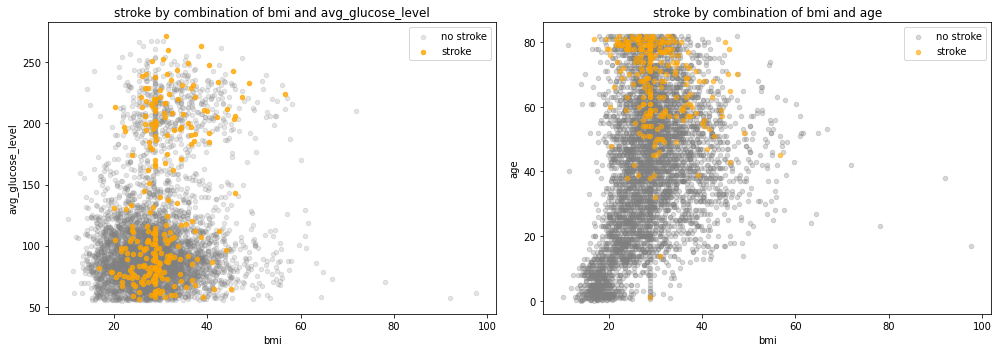

In [43]:
df = df_result

fig, ax = plt.subplots(1,2, figsize = (14,5))
((ax1, ax2)) = ax

df[df['stroke'] ==0].plot.scatter(ax=ax1, x='bmi', y='avg_glucose_level', alpha = 0.2, c='gray', label='no stroke')
df[df['stroke'] ==1].plot.scatter(ax=ax1, x='bmi', y='avg_glucose_level', alpha = 0.8, c='orange', label='stroke')
ax1.legend()
ax1.set_title('stroke by combination of bmi and avg_glucose_level')

df[df['stroke'] ==0].plot.scatter(ax=ax2, x='bmi', y='age', alpha = 0.3, c='gray', label='no stroke')
df[df['stroke'] ==1].plot.scatter(ax=ax2, x='bmi', y='age', alpha = 0.6, c='orange', label='stroke')
ax2.legend()
ax2.set_title('stroke by combination of bmi and age')

plt.tight_layout()
plt.show()

In [45]:
X = df.drop(columns=['stroke', 'id'])
Y = df['stroke']
split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)
for train_index, test_index in split.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [46]:
print(y_train.describe()[:3], y_test.describe()[:3])

count    4087.000000
mean        0.048691
std         0.215248
Name: stroke, dtype: float64 count    1022.000000
mean        0.048924
std         0.215814
Name: stroke, dtype: float64


In [47]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [48]:
scaler.fit(X_train[['age', 'avg_glucose_level', 'bmi']])
X_train_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_train_scaled[['age', 'avg_glucose_level', 'bmi']])

X_train_scaled.describe()

,age,avg_glucose_level,bmi,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4.087000e+03,4.087000e+03,4.087000e+03,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,...,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-2.022958e-16,2.486661e-16,-2.352127e-16,0.905310,0.094690,0.943235,0.056765,0.586494,0.413506,0.340103,...,0.003915,0.568632,0.162466,0.135796,0.497431,0.502569,0.302422,0.174945,0.371911,0.150722
std,1.000122e+00,1.000122e+00,1.000122e+00,0.292823,0.292823,0.231422,0.231422,0.492522,0.492522,0.473801,...,0.062454,0.495328,0.368923,0.342614,0.500055,0.500055,0.459363,0.379966,0.483374,0.357821
min,-1.907260e+00,-1.134397e+00,-2.402337e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.065280e-01,-6.366512e-01,-6.635186e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.688480e-02,-3.135136e-01,-6.236568e-02,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.836150e-01,1.822176e-01,5.064672e-01,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.711198e+00,3.712554e+00,8.883825e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
X_test_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test_scaled[['age', 'avg_glucose_level', 'bmi']])

In [50]:
def cf_matrix_show(cf_matrix, beta = 4):

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
    recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    fb_score  = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\nFb Score={:0.3f}".format(
                    accuracy,precision,recall,f1_score, fb_score)

    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)

Text(0, 0.5, 'Testing Accuracy')

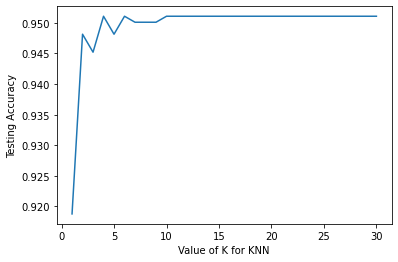

In [51]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')